In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
iris = pd.read_csv('http://h2o-public-test-data.s3.amazonaws.com/smalldata/iris/iris_wheader.csv')
iris.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


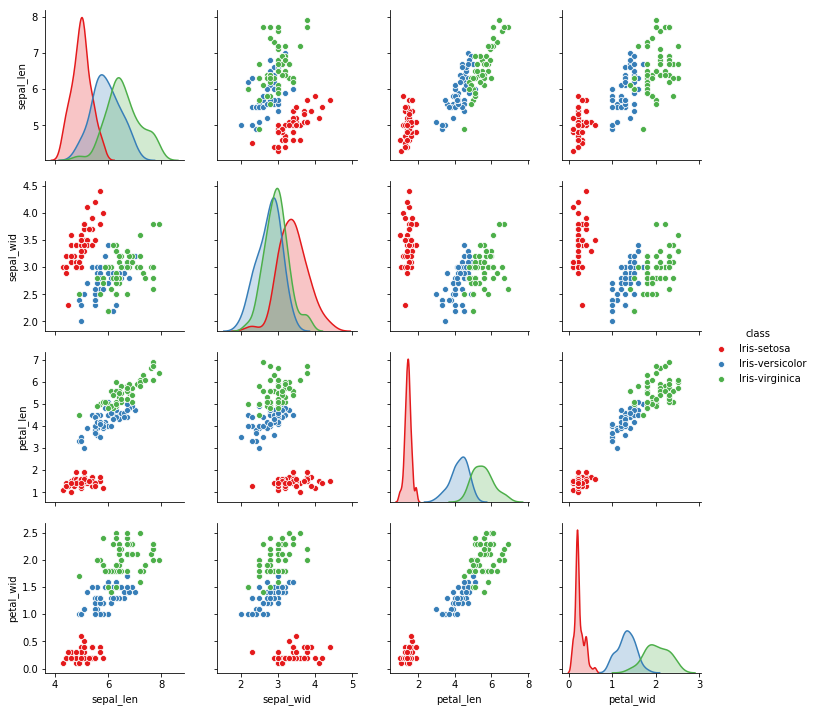

In [5]:
sns.pairplot(iris, hue='class',palette='Set1')

In [6]:
#Define features and reponse 
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]

In [7]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [8]:
#define fit and run model
clf=SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [9]:
#validate model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 0  7  1]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.94      0.94      0.94        16

      micro avg       0.95      0.95      0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38



## Classifying Benign and Non-Benign Cancer Tumors

In [10]:
from sklearn.datasets import load_breast_cancer

In [12]:
breast_cancer = load_breast_cancer()
features_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
label_df = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)

In [15]:
# define explanatory and response variables
X= features_df[['mean area', 'mean compactness']]
Y=pd.get_dummies(label_df, drop_first=True) #convert labels to binary numericals

In [16]:
#split data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1)

In [17]:
#define, fit and run model (on test data)
CLF=SVC(kernel='linear') # Linear Kernel
#CLF = svm.SVC(kernel='rbf')   # Radial Basis Function Kernel
CLF.fit(X_train, Y_train)

Y_pred = CLF.predict(X_test)
Y_predall = CLF.predict(X)# this is just used for plotting later on

In [18]:
#validate
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))

[[43 12]
 [ 5 83]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        55
           1       0.87      0.94      0.91        88

   micro avg       0.88      0.88      0.88       143
   macro avg       0.88      0.86      0.87       143
weighted avg       0.88      0.88      0.88       143



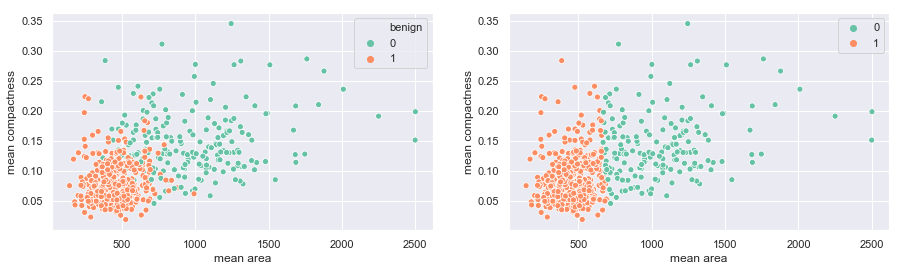

In [19]:
sns.set()
cmap = sns.cubehelix_palette(dark=.8, light=.3, as_cmap=True)
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

sns.scatterplot(x = features_df['mean area'], y = features_df['mean compactness'], hue = Y['benign'], palette="Set2", ax=axs[0])
sns.scatterplot(x = features_df['mean area'], y = features_df['mean compactness'], hue = Y_predall, palette="Set2",ax=axs[1]);